# DANOLOGIA - Generowanie reguł asocjacyjnych, Algorytm koszykowy
import bibliotek

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import csv
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Przygotowywanie danych

In [ ]:
data = []

with open("supermarket.csv", "r") as file:
    for line in file:
        values = line.strip().split(",")
        data.append(values)

# Zbiór Set unikalnych elementów
unique_items = set(item for row in data for item in row)

# Pusty słownik gdzie będą sortowane dane
data_dict = {item: [] for item in unique_items}

# Wypełnienie słownika 0 lub 1
for row in data:
    for item in unique_items:
        data_dict[item].append(1 if item in row else 0)

# Stworzenie ramki danych
df = pd.DataFrame(data_dict)

df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['baby needs', 'bread and cake', 'baking needs', 'juice-sat-cord-ms', 'biscuits', 'canned vegetables', 'cleaners-polishers', 'coffee', 'sauces-gravy-pkle', 'confectionary', 'dishcloths-scour', 'frozen foods', 'razor blades', 'party snack foods', 'tissues-paper prd', 'wrapping', 'mens toiletries', 'cheese', 'milk-cream', 'margarine', 'small goods', 'fruit', 'vegetables', 'department122', '750ml white nz', 'high'], ['department1', 'canned fish-meat', 'canned fruit', 'canned vegetables', 'sauces-gravy-pkle', 'deod-disinfectant', 'frozen foods', 'pet foods', 'laundry needs', 'tissues-paper prd', 'deodorants-soap', 'haircare', 'milk-cream', 'fruit', 'vegetables', 'low'], ['bread and cake', 'baking needs', 'juice-sat-cord-ms', 'biscuits', 'canned fruit', 'sauces-gravy-pkle', 'puddings-deserts', 'wrapping', 'health food other', 'small goods', 'dairy foods', 'beef', 'lamb', 'fruit', 'vegetables', 'stationary', 'department137', 'low'], ['department1', 'bread and cake', 'baking needs', 'juice-s

,low,hogget,poultry,mens toiletries,cigarette cartons,produce misc,dishcloths-scour,soft drinks,750ml red nz,fruit,...,department7,pkt-canned soup,tea,manchester,department122,cold-meats,fruit drinks,beef,canned vegetables,potatoes
0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,1,1,0
4623,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4624,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4625,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# L/1
---
1. Podaj nazwy produktów i wsparcie dla najliczniejszego zbioru częstego spośród zbiorów częstych o minimalnym wsparciu równym 25%. Jeżeli istnieje
wiele równolicznych zbiorów, podaj ten o największym wsparciu. Wyniki liczbowe
zaokrąglij do 2 miejsc po przecinku. Zinterpretuj uzyskane wyniki. Podaj kod, dzięki któremu uzyskałeś podane wyniki.
---


In [ ]:
frequent_item_sets = apriori(df, min_support=0.25, use_colnames=True)
most_populated_set = frequent_item_sets.sort_values(by='itemsets', key=lambda x: x.apply(len), ascending=False).iloc[0]
print("Nazwy produktów")
print(list(most_populated_set.itemsets))
print("\nWsparcie najliczniejszego zbioru")
print(f'Support: {round(most_populated_set.support,2)} \n')


Nazwy produktów
['vegetables', 'milk-cream', 'baking needs', 'bread and cake']

Wsparcie najliczniejszego zbioru
Support: 0.25 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# L/2
---
2. Wyrysuj histogram występowania produktów w bazie. Zidentyfikuj 3 produkty występujące najczęściej.
---


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


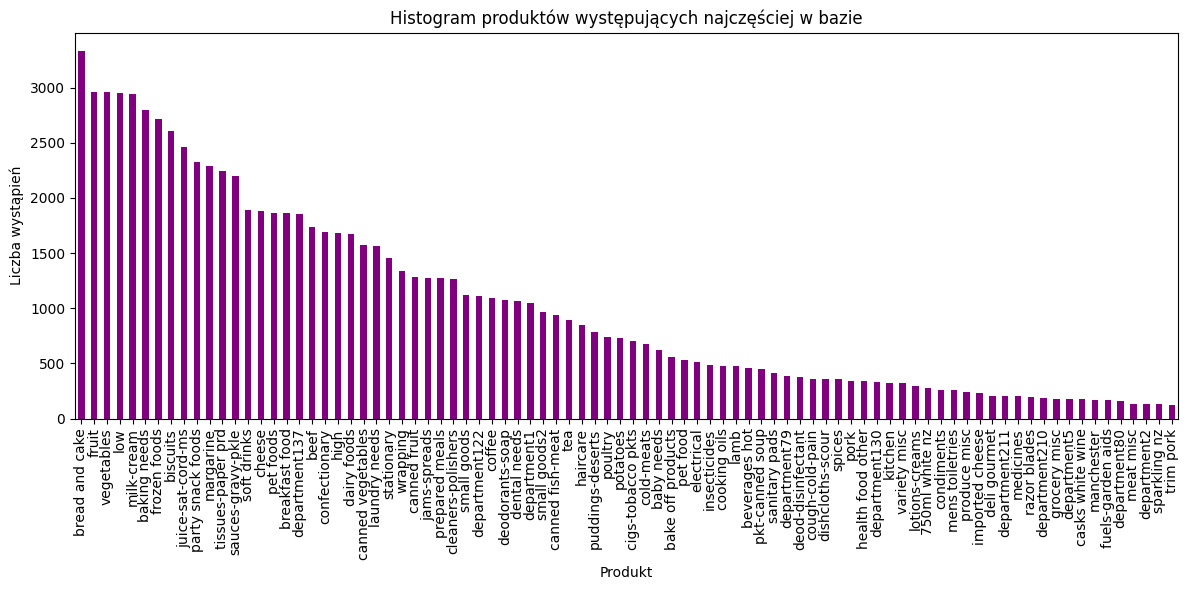

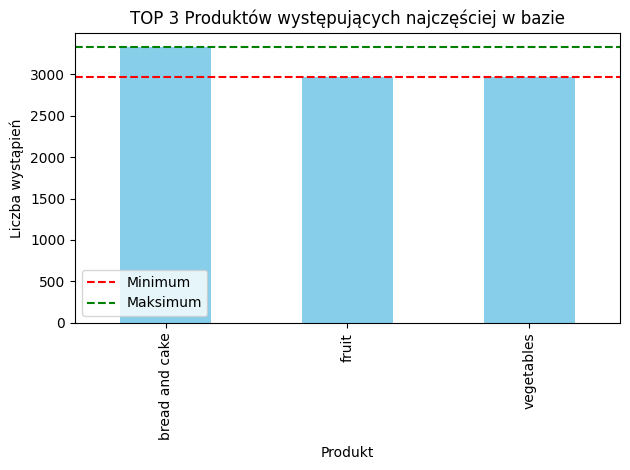

bread and cake    3330
fruit             2962
vegetables        2961
dtype: int64


In [ ]:
product_list = [product for row in data for product in row if isinstance(product, str)]
product_counts = pd.Series(product_list).value_counts()
display_count = int(0.7 * len(product_counts))
top_products = product_counts.head(display_count)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='purple')
plt.title('Histogram produktów występujących najczęściej w bazie')
plt.xlabel('Produkt')
plt.ylabel('Liczba wystąpień')
plt.tight_layout()
plt.show()

display_count = int(3)
top_products = product_counts.head(display_count)
plt.figure()
top_products.plot(kind='bar', color='skyblue')
plt.title('TOP 3 Produktów występujących najczęściej w bazie')
plt.xlabel('Produkt')
plt.ylabel('Liczba wystąpień')
plt.axhline(y=top_products.min(), color='red', linestyle='--', label='Minimum')
plt.axhline(y=top_products.max(), color='green', linestyle='--', label='Maksimum')
plt.legend()
plt.tight_layout()
plt.show()
print(product_counts[:3])


# L/3
---
3. Wygeneruj zbiory często o minimalnym wsparciu 25%, na podstawie tych zbiorów wygeneruj reguły o minimalnej wartości ufności (confidence) równej 0.75. Podaj uzyskane reguły i zinterpretuj je. Czy patrząc na wsparcia poprzedników i następników implikacji, jak również na miarę lift można powiedzieć, że te reguły są wartościowe? Podaj kod, dzięki któremu uzyskałeś podane wyniki. Wyniki liczbowe zaokrąglij do 2 miejsc po przecinku.
---


In [ ]:
frequent_itemsets = apriori(df, min_support=0.25, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.75)
print("Association Rules:")
rules.round(2)


Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soft drinks),(bread and cake),0.41,0.72,0.31,0.76,1.05,0.02,1.15,0.08
1,(fruit),(bread and cake),0.64,0.72,0.50,0.78,1.09,0.04,1.30,0.23
2,(high),(frozen foods),0.36,0.59,0.28,0.76,1.29,0.06,1.71,0.35
3,(high),(vegetables),0.36,0.64,0.27,0.76,1.18,0.04,1.48,0.24
4,(high),(baking needs),0.36,0.60,0.28,0.76,1.26,0.06,1.67,0.33
...,...,...,...,...,...,...,...,...,...,...
100,"(baking needs, fruit, bread and cake)",(vegetables),0.34,0.64,0.27,0.80,1.25,0.05,1.82,0.31
101,"(vegetables, biscuits, bread and cake)",(fruit),0.32,0.64,0.26,0.82,1.28,0.06,1.97,0.32
102,"(vegetables, biscuits, fruit)",(bread and cake),0.30,0.72,0.26,0.87,1.20,0.04,2.09,0.24
103,"(biscuits, fruit, bread and cake)",(vegetables),0.33,0.64,0.26,0.79,1.23,0.05,1.71,0.28


##### Support (wsparcie): jak często dana reguła występuje
##### Confidence : Jak często dana reguła jest prawidłowa
##### Lift: jak bardzo prawdopodobieństwo wystąpienia następnika zalezy od poprzednika

Wartość wsparcia (support) informuje, jak często reguła jest spełniana w danych. Reguły o wyższym wsparciu są bardziej ogólne.

Wyższa wartość ufności (confidence) oznacza, że reguła jest bardziej pewna, co sugeruje, że następnik jest bardziej prawdopodobny w obecności poprzednika.

Miara lift jest przydatna do oceny siły zależności między poprzednikiem a następnikiem. Lift powyżej 1 oznacza, że istnieje pozytywna zależność między nimi, a im wyższa wartość lift, tym silniejsza zależność.

# L/4
---
4. Dla jakich kombinacji produktów, wartość rachunku jest wysoka (jakie jest X z reguły X→ {high})? Zawęź poszukiwania poprzez wygenerowanie w pierwszej kolejności zbiorów częstych o minimalnym wsparciu 15%, a następnie, wygenerowanie reguł o ufności minimalnej 0.50. Dla tak otrzymanych reguł wybierz tylko te, które mają jako następnik implikacji jedynie element high. Podaj i zinterpretuj uzyskane wyniki. Jak oceniasz, czy te reguły są wartościowe (porównaj wartość lift)? Liczby zaokrąglij do 2 miejsc po przecinku. Zamieść kod, dzięki któremu uzyskałeś podane wyniki.
---


In [ ]:
frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
high_rules = rules[rules['consequents'] == {'high'}]
print("Association Rules with Consequent → 'high':")
high_rules.round(2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association Rules with Consequent → 'high':


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
79,(cheese),(high),0.41,0.36,0.21,0.51,1.39,0.06,1.29,0.48
80,(pet foods),(high),0.40,0.36,0.21,0.51,1.41,0.06,1.31,0.49
84,(tissues-paper prd),(high),0.49,0.36,0.25,0.51,1.42,0.07,1.31,0.57
86,(wrapping),(high),0.29,0.36,0.16,0.55,1.53,0.06,1.43,0.48
89,(laundry needs),(high),0.34,0.36,0.18,0.54,1.48,0.06,1.37,0.49
...,...,...,...,...,...,...,...,...,...,...
7152,"(baking needs, bread and cake, biscuits, fruit)",(high),0.24,0.36,0.15,0.64,1.75,0.06,1.75,0.56
7947,"(baking needs, frozen foods, vegetables, bread...",(high),0.24,0.36,0.16,0.65,1.78,0.07,1.80,0.58
7963,"(vegetables, frozen foods, biscuits, bread and...",(high),0.24,0.36,0.16,0.65,1.78,0.07,1.81,0.58
7979,"(baking needs, frozen foods, biscuits, bread a...",(high),0.24,0.36,0.16,0.67,1.84,0.07,1.91,0.60
